In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cbsodata

In [35]:
# Load Datasets
data_lic_temp   = pd.DataFrame(cbsodata.get_data('83488ENG', 
                        dir = 'C:/Users/Jochi/TIL6022-LabAssignments-group-11/Data')) # People with a driving licence
df_pop_temp = pd.DataFrame(cbsodata.get_data('7461ENG'))   # Insert dataset with population data

In [90]:
# Get Datasets.
data_lic = data_lic_temp
df_pop = df_pop_temp

Filter the datasets to use them.

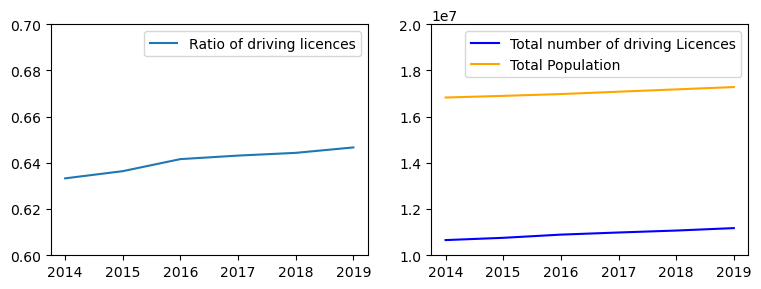

In [88]:
y = df_pop[64:70].TotalPopulation_1.values
x = data_lic[0:6].PeopleWithADrivingLicence_1.values
years = data_lic[0:6].Periods.values

plt.figure(figsize=(9, 3.
                   ))
plt.subplot(1,2,1)
plt.plot(z, label='Ratio of driving licences')
plt.ylim(0.6, 0.7)
plt.legend(loc='best')
plt.xticks(ticks=np.arange(0,6,1), labels=years)

plt.subplot(1,2,2)
plt.plot(x, label='Total number of driving Licences', color='b')
plt.plot(y, label='Total Population', color='orange')
plt.legend(loc= 'best')
plt.xticks(ticks=np.arange(0,6,1), labels=years)
plt.ylim(10e6, 20e6)

plt.savefig('Ratio')
plt.show()

In [3]:
# Get list of the years from driving licence and filter these years from population dataset.
years = list(set(data_lic.Periods.values))
years = np.sort(years)
df_pop = df_pop[df_pop['Periods'].isin(years)]

# Filter age groups required for driving licence dataset.
ages = data_lic.AgeDrivingLicenseHolder.values
ages = list(set(ages))
ages_not = ['16 to 17 years','Age unknown', 'Total']
ages = [x for x in ages if x not in ages_not]
ages = np.sort(ages)

# Filter age groups required for population dataset.
ages_pop = ['18 years', '19 years', '20 to 25 years', '25 to 30 years', '30 to 40 years',
            '40 to 50 years', '50 to 60 years', '60 to 65 years', '65 to 70 years', 
            '70 to 75 years', '75 to 80 years', '80 to 90 years', '90 years or older']
df_pop = df_pop[df_pop['Age'].isin(ages_pop)]

# Map driving licence age groups on population age groups and replace.
df_pop = df_pop[df_pop['Sex'] == 'Men and women']
mapping = {
            '18 years':'18 to 19 years',
            '19 years':'18 to 19 years',
            '20 to 25 years':'20 to 24 years',
            '25 to 30 years':'25 to 29 years',
            '30 to 40 years':'30 to 39 years',
            '40 to 50 years':'40 to 49 years',
            '50 to 60 years':'50 to 59 years',
            '60 to 65 years':'60 to 64 years',
            '65 to 70 years':'65 to 69 years',
            '70 to 75 years':'70 to 74 years' ,
            '75 to 80 years':'75 years or older', 
            '80 to 90 years':'75 years or older', 
            '90 years or older':'75 years or older',
}
df_pop['Age'].replace(mapping, inplace=True)

# Filter types of cars for driving licence dataset.
sorts = data_lic.CategoryDrivingLicence.values
sorts = list(set(sorts))
cars = ['Moped driving licence', 'Passenger car licence incl. trailer', 
        'Passenger car licence excl. trailer', 'Passenger car driving licence total', ]
large_cars= [x for x in sorts if x not in cars]

# Filter Dutch regions for driving licence dataset.
regions = data_lic.Region.values
regions = list(set(regions))
no_province= ['Noord-Nederland (LD)','Nederland', 'Oost-Nederland (LD)', 'Zuid-Nederland (LD)', 
              'Unclassifiable (LD)', 'West-Nederland (LD)']
provinces = [x for x in regions if x not in no_province]

In [42]:
print(data_lic.PeopleWithADrivingLicence_1.max())
print(data_lic.PeopleWithADrivingLicence_1.idxmax())
x = data_lic.PeopleWithADrivingLicence_1[8]
print(x)
print(x/17590672)

,ID,Sex,Age,Periods,TotalPopulation_1,NeverMarried_2,Married_3,Widowed_4,Divorced_5
0,0,Men and women,Total population (all ages),1950,10026773,5284496,4232241.0,435532.0,74504.0
1,1,Men and women,Total population (all ages),1951,10200280,5354293,4329761.0,439933.0,76293.0
2,2,Men and women,Total population (all ages),1952,10328343,5384853,4421572.0,444343.0,77575.0
3,3,Men and women,Total population (all ages),1953,10435631,5409984,4497526.0,449090.0,79031.0
4,4,Men and women,Total population (all ages),1954,10550737,5443474,4572974.0,454436.0,79853.0
5,5,Men and women,Total population (all ages),1955,10680023,5481327,4658053.0,459762.0,80881.0
6,6,Men and women,Total population (all ages),1956,10821661,5526994,4746401.0,465827.0,82439.0
7,7,Men and women,Total population (all ages),1957,10957040,5567164,4834087.0,472164.0,83625.0
8,8,Men and women,Total population (all ages),1958,11095726,5607936,4924488.0,478607.0,84695.0
9,9,Men and women,Total population (all ages),1959,11278024,5677101,5027106.0,487125.0,86692.0


11642850.0
13346
11444831.0
0.6506193168743071


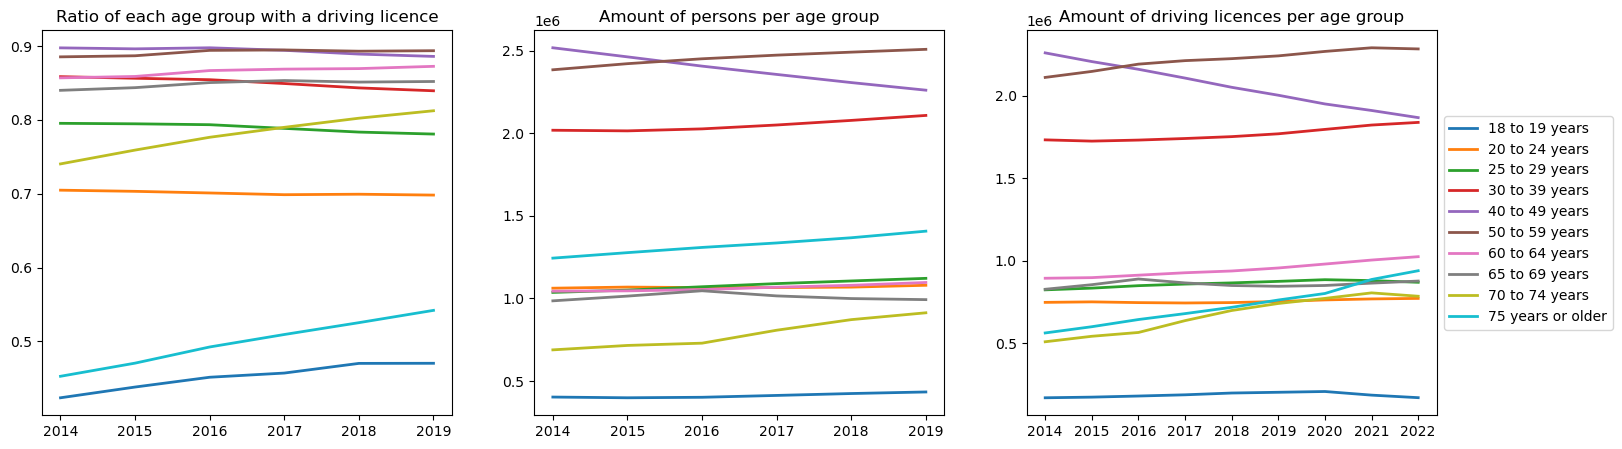

In [4]:
# create figure for three subplots.
f = plt.figure(figsize=(18, 5)) 

# Filter dataset on total data, per age group for passenger cars.
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    data_lic_tot.PeopleWithADrivingLicence_1.astype(int) # convert data to integer

# Group population data per age and year.
    df_pop_tot = df_pop[(df_pop.Age == ages[i])]
    df_pop_new = df_pop_tot.groupby(['Periods']).sum()

# Create new column for the ratio of driving licences per age group.
    x = np.zeros(len(df_pop_new))
    for j in range(len(df_pop_new)):
        x[j]= data_lic_tot.iloc[j, 5] / df_pop_new.iloc[j, 1]
    df_pop_new['Ratio'] = x

# Plot data of Ratio of driving licences per age group.
    plt.subplot(1, 3, 1)
    plt.plot(data_lic_tot.Periods[0:6], df_pop_new.Ratio, label=ages[i], linewidth=2)
    plt.title('Ratio of each age group with a driving licence')

# Plot data of total persons per age group over the years.
    plt.subplot(1, 3, 2)
    plt.plot(data_lic_tot.Periods[0:6], df_pop_new.TotalPopulation_1, label = ages[i], linewidth =2)
    plt.title('Amount of persons per age group')
    
# Filter dataset on total data, per age group for passenger cars.
plt.subplot(1, 3, 3)
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    
# Plot data of total driving licences per age group over the years.
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=ages[i], 
             linewidth =2)
plt.title('Amount of driving licences per age group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Three_plots', bbox_inches='tight')
plt.show()

The first plot above shows the ratio of each age group with a driving licence. The second plot shows a distribution of the persons per age group and the third plot shows the amount of driving licences per age group. In the plots can be seen that the age group: '75 years or older' is still growing and 

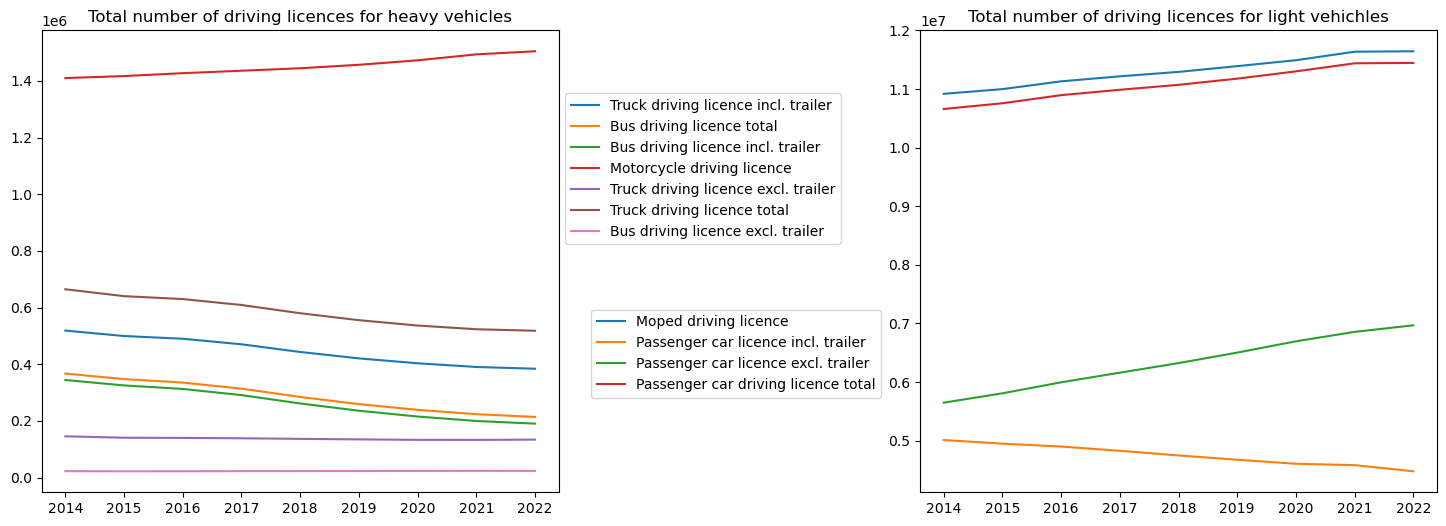

In [5]:
# Create figure and whitespace for legends
f = plt.figure(figsize=(18, 6))    
plt.subplots_adjust(wspace=0.7)

# Filter data and plot for Heavy vehicles.
plt.subplot(1,2,1)
for i in range(len(large_cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == large_cars[i])]
    
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=large_cars[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.title('Total number of driving licences for heavy vehicles')

# Filter data and plot for light vehicles.
plt.subplot(1,2,2, )
for i in range(len(cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == cars[i])]
    
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=cars[i])
plt.legend(loc='center left', bbox_to_anchor=(-0.65, 0.3))
plt.title('Total number of driving licences for light vehichles')
plt.savefig('Two_plots' , bbox_inches='tight')
plt.show()

The plots above show the total number of driving licences for different vehicle types. Interestingly the licences for trucks and buses with a trailer are gradually lowering and therefore the total number of licences is getting lower. The licences for a truck and bus excl. a trailer stay the same. This change in licences could be due to the fact that more people with such a specific licence are retiring. New truck drivers might not need a licence where they can drive with a trailer as the demand for this is lower. Still, the number of drivers with a licence incl. a trailer is higher.


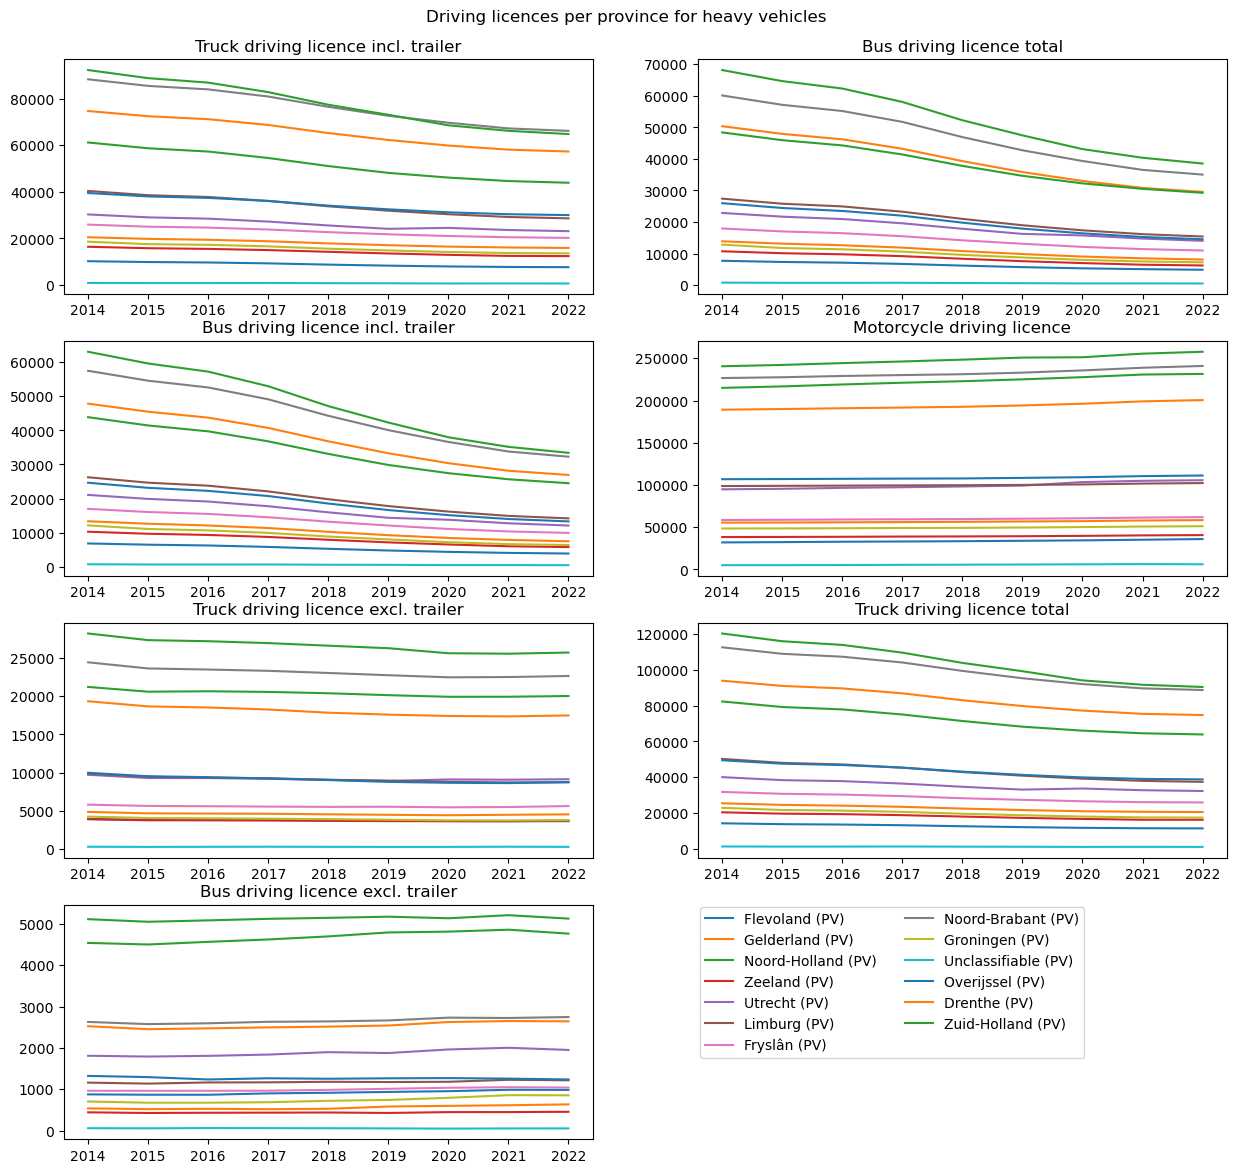

In [6]:
plt.figure(figsize=(15, 25))
for i in range(len(provinces)):
    for j in range(len(large_cars)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[i])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == large_cars[j])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{provinces[i]}')
        plt.title(large_cars[j])
        #plt.ylim(0, 3e5)
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)
plt.suptitle('Driving licences per province for heavy vehicles', y=0.9)
plt.savefig('heavy', bbox_inches='tight')
plt.show()

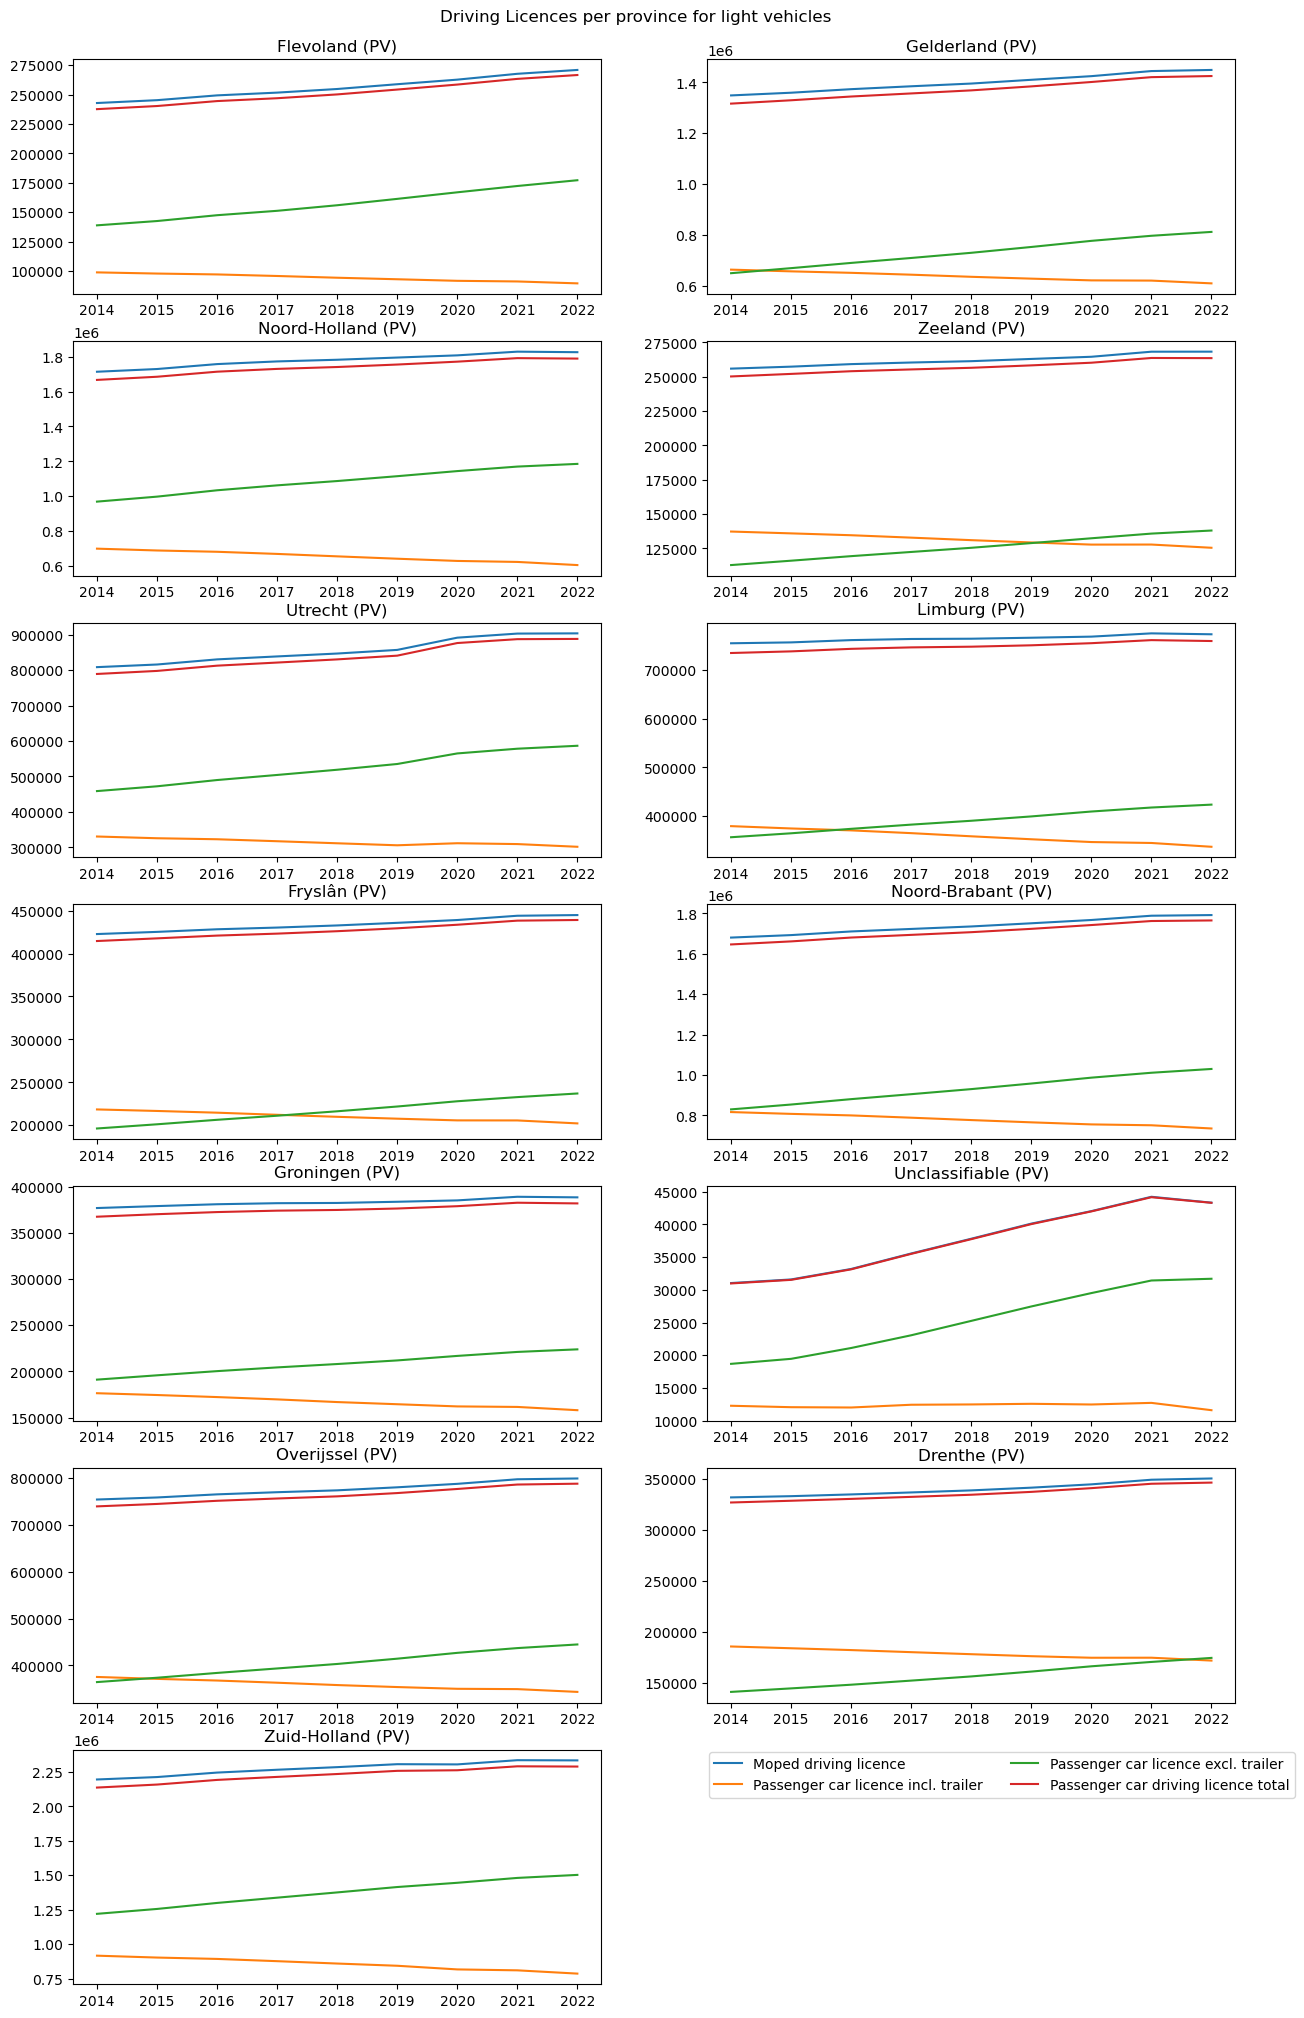

In [7]:
plt.figure(figsize=(15, 25))
for i in range(len(cars)):
    for j in range(len(provinces)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[j])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == cars[i])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{cars[i]}')
        plt.title(provinces[j])
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)
plt.suptitle('Driving Licences per province for light vehicles', y=0.9)
plt.savefig('light', bbox_inches='tight')
plt.show()

### Drivers license data in the Netherlands.
This section will present some general data on drivers licences in the Netherlands. 
 